In [1]:
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt 
import re
from matplotlib.offsetbox import AnchoredText
sns.set_style("white")
%matplotlib inline 

In [2]:
df = pd.read_csv("plate1/high_expression/plate1_high_expression_fluorescence_vs_temperature.csv")

In [3]:
df_tm = pd.read_csv('plate1/high_expression/plate1_high_expression_manual_Tm_detection.csv', header=1)

In [4]:
temps = list(df['X'])

In [5]:
col_to_keep = [x for x in df.columns if not re.match('X', x)]
df_data = df[col_to_keep]

In [6]:
df4= pd.read_csv("plate4/high_expression/plate4_high_expression_fluorescence_vs_temperature.csv")
col_to_keep = [x for x in df4.columns if not re.match('X', x)]
df_data4 = df4[col_to_keep]
df_tm4 = pd.read_csv('plate4/high_expression/plate4_high_expression_manual_Tm_detection.csv', header=1)
temps4 = list(df4['X'])

In [86]:
df_exp = pd.read_excel('/Users/albaness/github/kinase-ecoli-expression-panel/expression_data/96-kinase/470_Report_Expression_Test_Results.xls')
list_of_wells = [x.split(':')[0] for x in col_to_keep]
df_exp = df_exp[df_exp.Well.isin(list_of_wells)]
kinase_names = list(df_exp[ 'target ID'])
kinase_names = [x[:-3] for x in kinase_names]
wells = list(df_exp[ 'Well'])
kinase_dict = dict(zip(wells, kinase_names))

In [87]:
kinase_dict

{'C12': 'VRK3_HUMAN',
 'C5': 'KC1G1_HUMAN',
 'C6': 'DYR1A_HUMAN',
 'D1': 'PMYT1_HUMAN',
 'D10': 'MK11_HUMAN',
 'D3': 'GAK_HUMAN',
 'D9': 'KC1G3_HUMAN',
 'E5': 'CSK_HUMAN',
 'G5': 'STK3_HUMAN',
 'H11': 'FES_HUMAN',
 'H5': 'MK14_HUMAN',
 'H6': 'VRK1_HUMAN',
 'H7': 'MK13_HUMAN',
 'H8': 'MK03_HUMAN'}

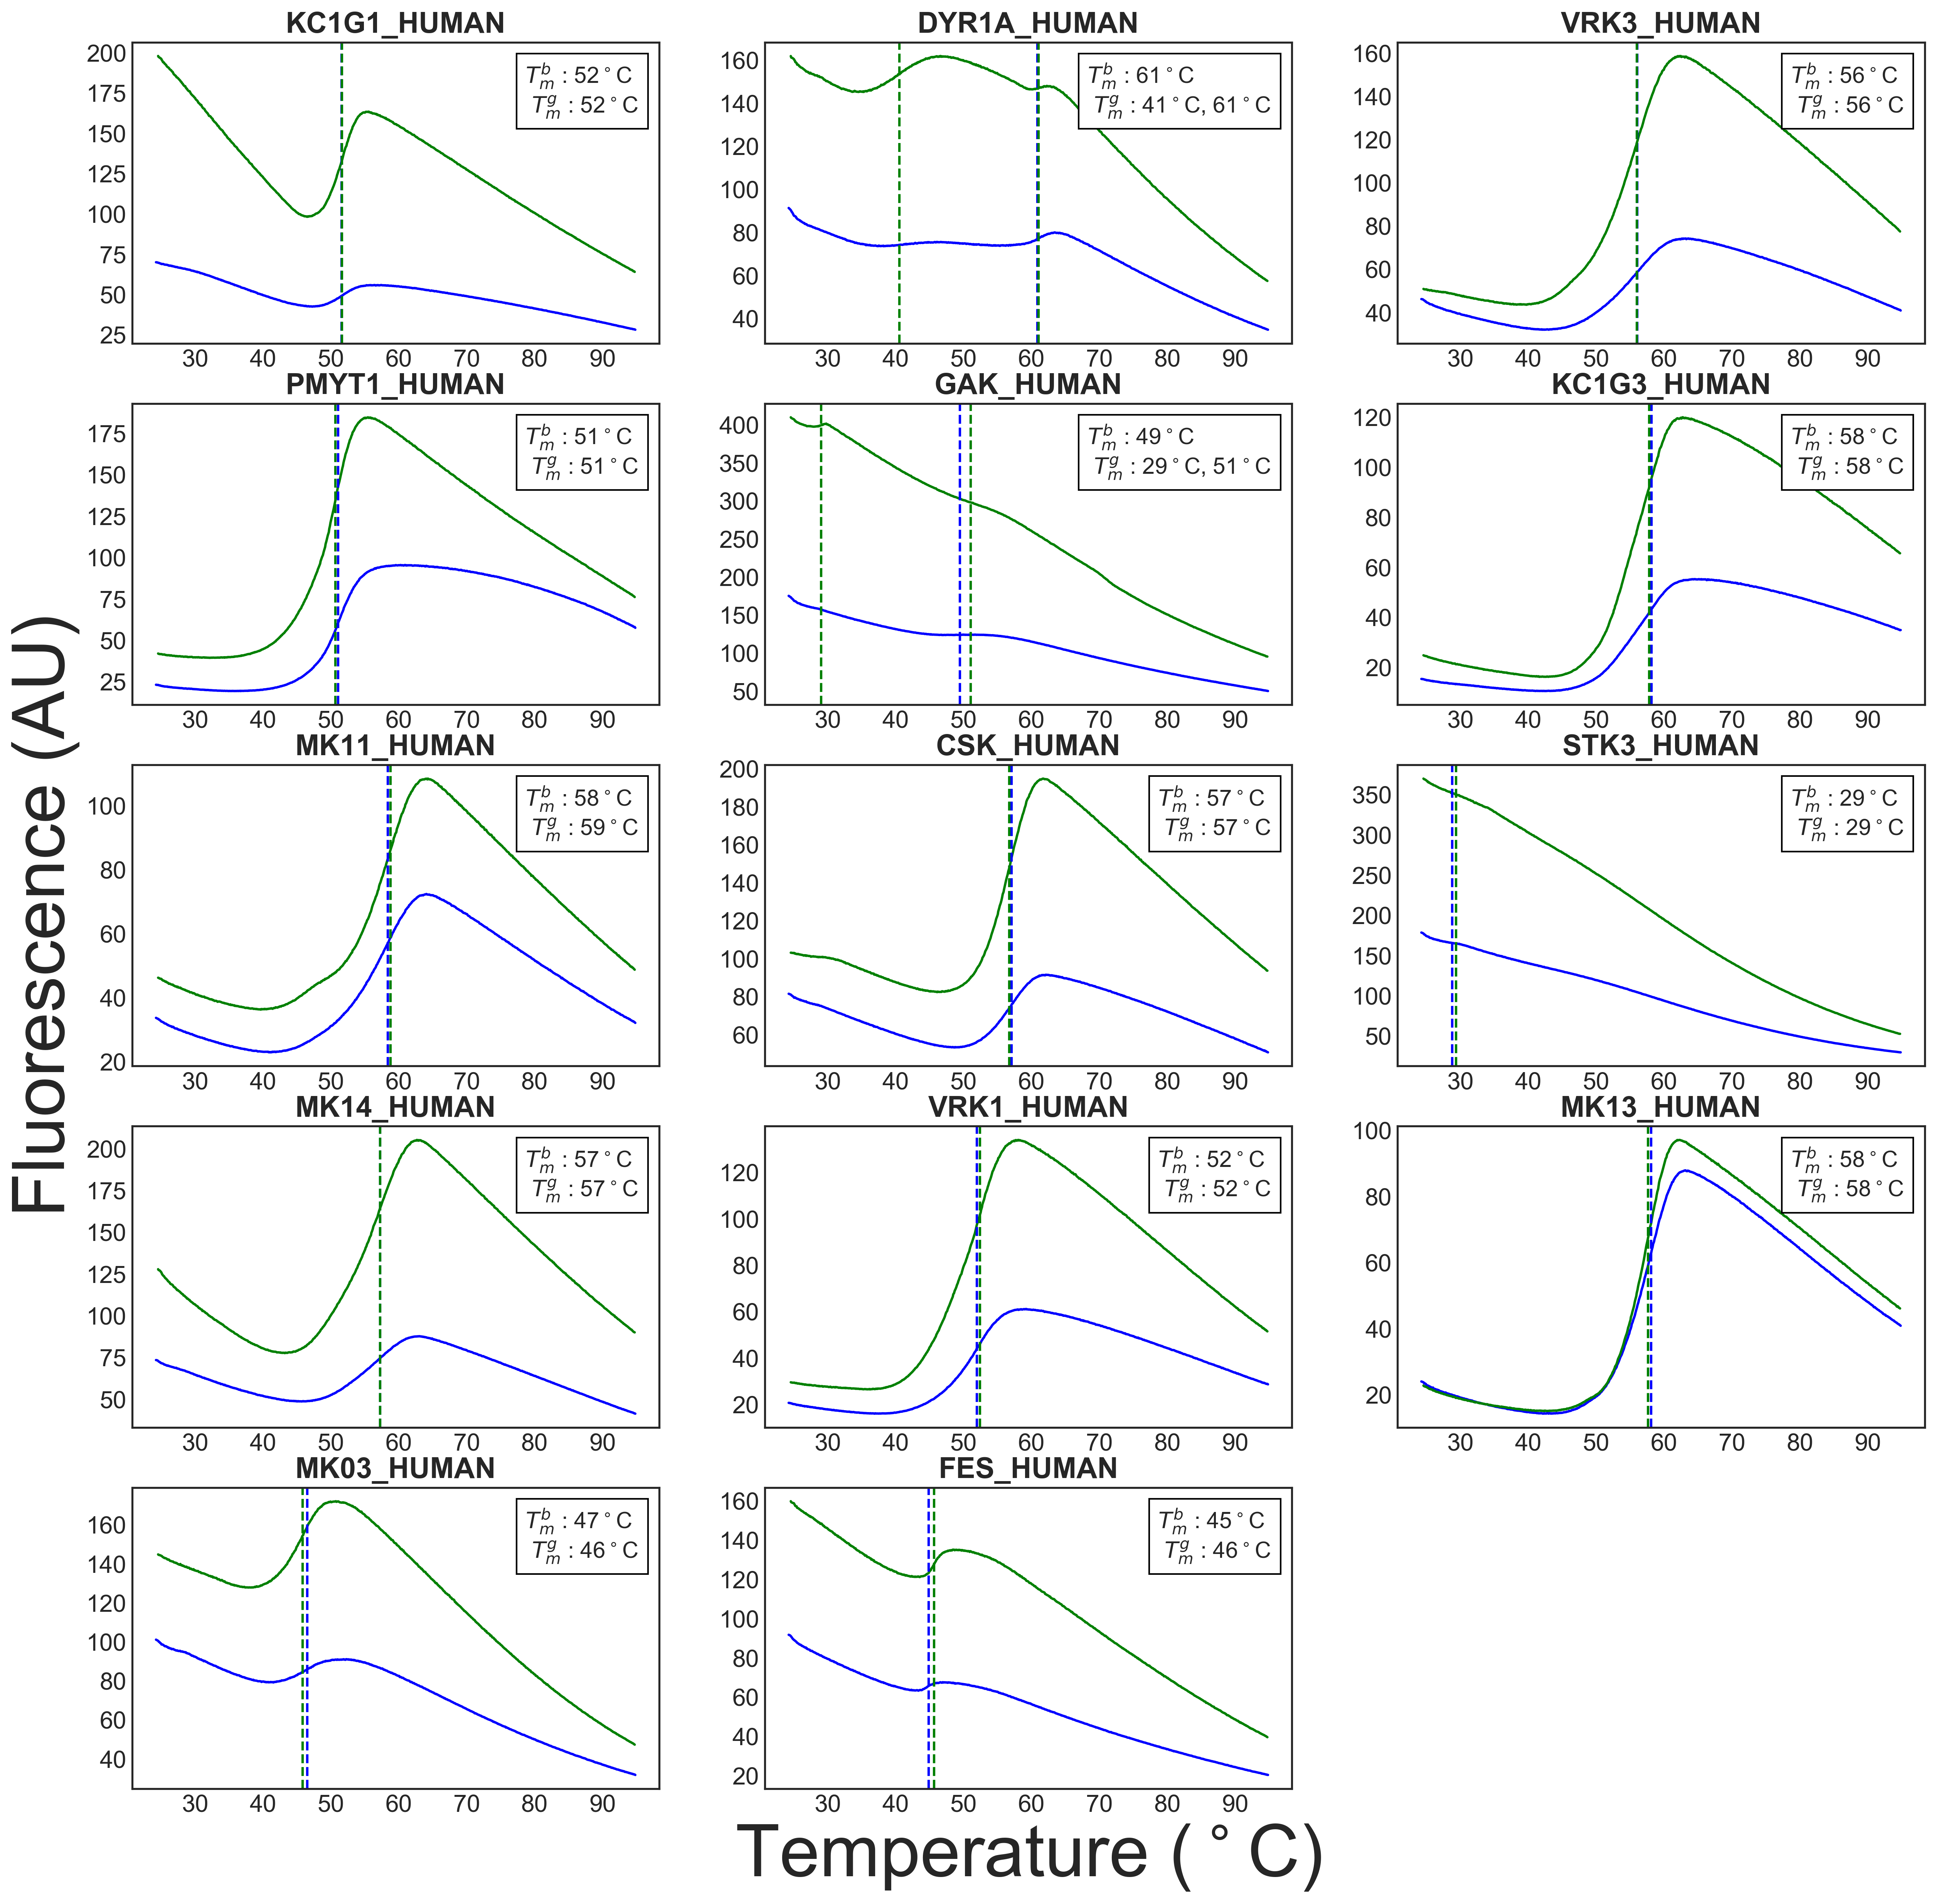

In [90]:
fig = plt.figure(figsize=(20,20), dpi=300)
for i,col in enumerate(col_to_keep):
    well = list_of_wells[i]
    index = i +1
    ax = fig.add_subplot(5,3,index)
    plt.plot(temps, df_data[col], color='blue')
    plt.plot(temps4, df_data4[col], color='green')
    plt.axvline(x=list(df_tm['Tm1'])[i], color='blue', linestyle='--')
    plt.axvline(x=list(df_tm4['Tm1'])[i], color='green', linestyle='--')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title('%s' % kinase_dict[well], fontsize=18, fontweight='bold')
    if i == 13: 
        plt.xlabel('Temperature ($^\circ$C)', fontsize=45)
    if i == 6: 
        plt.ylabel('Fluorescence (AU)', fontsize=45)
    if str(list(df_tm4['Tm2'])[i]) != 'nan': 
        plt.axvline(x=list(df_tm4['Tm2'])[i], color='green', linestyle='--')
        anchored_text = AnchoredText("$T_m^{b}$ : %.0f$^\circ$C \n $T_m^{g}$ : %.0f$^\circ$C, %.0f$^\circ$C " % (list(df_tm['Tm1'])[i], list(df_tm4['Tm1'])[i], list(df_tm4['Tm2'])[i]) , loc=1, prop=dict(size=14))
    else: 
        anchored_text = AnchoredText("$T_m^{b}$ : %.0f$^\circ$C \n $T_m^{g}$ : %.0f$^\circ$C " % (list(df_tm['Tm1'])[i], list(df_tm4['Tm1'])[i]) , loc=1, prop=dict(size=14))
    #anchored_text = AnchoredText("$T_m^1$ : %.0f$^\circ$C" % (list(df_tm['Tm1'])[i]) , loc=1, prop=dict(size=15))
    ax.add_artist(anchored_text)
fig.savefig('bothplates_tm.pdf', dpi=300)